# Lesson 3 - Problem Set

Please solve the questions in this notebook and submit the completed notebook. The timestamp of submission will be considered the timestamp of completion.

1. Using the Tawian credit card data set provided in class (i.e. Data Set 2), implement a logistic regression model to classify individuals likely to default on their credit in Taiwan.

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [10, 5]

In [63]:
raw_credit_card = pd.read_csv('credit_card.csv')
raw_credit_card['default.payment.next.month'].value_counts() # imbalance issue
# scale issue

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

In [12]:
raw_credit_card.describe()

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5a0f95bd68>,
      dtype=object)

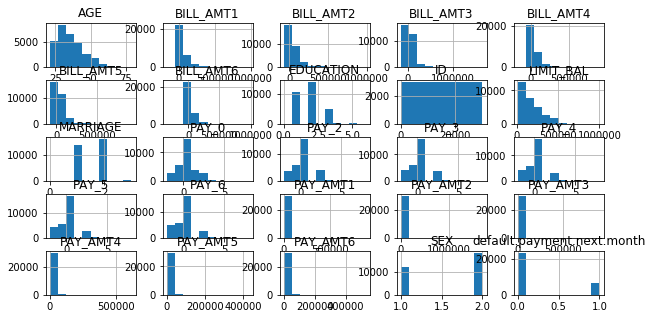

In [11]:
raw_credit_card.hist()

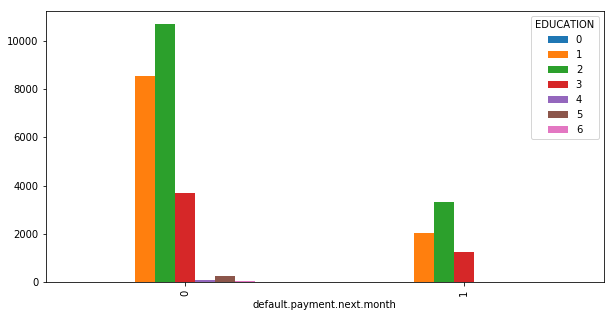

In [16]:
pd.crosstab(raw_credit_card['default.payment.next.month'], raw_credit_card['EDUCATION']).plot(kind='bar')

In [19]:
sex_dummies = pd.get_dummies(raw_credit_card['SEX'], prefix='sex')
education_dummies = pd.get_dummies(raw_credit_card['EDUCATION'], prefix='edu')
marriage_dummies = pd.get_dummies(raw_credit_card['MARRIAGE'], prefix='marriage')

In [71]:
len(X1)
len(X2)

23364

In [85]:
drop_columns = [
    'ID',
    'SEX',
    'EDUCATION',
    'MARRIAGE',
    'default.payment.next.month'
]
# X = raw_credit_card.drop(columns=drop_columns).join([sex_dummies, education_dummies, marriage_dummies])
df_credit_card = raw_credit_card.join([sex_dummies, education_dummies, marriage_dummies])
X1 = df_credit_card[df_credit_card['default.payment.next.month'] == 1]
X2 = df_credit_card[df_credit_card['default.payment.next.month'] == 0]
sample_size = len(X1) if len(X1) < len(X2) else len(X2)
X = pd.concat([X1.sample(sample_size), X2.sample(sample_size)])
# print(X['default.payment.next.month'].value_counts())
y = X.loc[:, 'default.payment.next.month']
X = X.drop(columns=drop_columns)

In [114]:
from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# scaler.fit_transform(X, )

In [87]:
X.isna().any()

LIMIT_BAL     False
AGE           False
PAY_0         False
PAY_2         False
PAY_3         False
PAY_4         False
PAY_5         False
PAY_6         False
BILL_AMT1     False
BILL_AMT2     False
BILL_AMT3     False
BILL_AMT4     False
BILL_AMT5     False
BILL_AMT6     False
PAY_AMT1      False
PAY_AMT2      False
PAY_AMT3      False
PAY_AMT4      False
PAY_AMT5      False
PAY_AMT6      False
sex_1         False
sex_2         False
edu_0         False
edu_1         False
edu_2         False
edu_3         False
edu_4         False
edu_5         False
edu_6         False
marriage_0    False
marriage_1    False
marriage_2    False
marriage_3    False
dtype: bool

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [102]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [109]:
X = X_scaled
y = y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [111]:
logReg = LogisticRegression()
logReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [112]:
score = logReg.score(X_test, y_test)
print(score)
report = classification_report(y_test, logReg.predict(X_test))
print(report)

0.6790557508789553
             precision    recall  f1-score   support

          0       0.67      0.70      0.68      1989
          1       0.69      0.66      0.67      1993

avg / total       0.68      0.68      0.68      3982



In [113]:
logReg.predict(X_test)

array([1, 1, 1, ..., 0, 1, 1])

In [108]:
y_test.sum()

1993